# Descripción detallada de los datos

Se importan las librerias de python usadas

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import yfinance as yf

Se obtienen cuáles son las siglas para cada empresa dentro de SP500 para hacer la descarga de los valores históricos.

In [3]:
stocks=pd.read_csv('Stocks in the SP 500 Index.csv')
stocks.head()

,Symbol,Description,Category2,Category3,GICS Sector,Market cap,Dividend yield,Price to TTM earnings,Price to TTM sales,Price to book value,Action
0,AAPL,Apple Inc,Common stocks,Large cap,Information Technology,"$2,780,722,218,560",0.52%,0.0,0.0,0.0,Analyze
1,MSFT,Microsoft Corp,Common stocks,Large cap,Information Technology,"$2,182,999,529,853",0.83%,0.0,0.0,0.0,Analyze
2,AMZN,Amazon.Com Inc.,Common stocks,Large cap,Consumer Discretionary,"$1,474,954,186,550",0.00%,0.0,0.0,0.0,Analyze
3,TSLA,Tesla Inc,Common stocks,Large cap,Consumer Discretionary,"$960,607,021,895",0.00%,0.0,0.0,0.0,Analyze
4,BRK.B,Berkshire Hathaway Inc. Class B,Common stocks,Large cap,Financials,"$675,735,341,361",0.00%,0.0,0.0,0.0,Analyze


Con los simbolos en una lista se descargan en un loop los valores para cada uno, entre las fechas de 1/1/2018 y 30/06/2022. Sólo se tienen en cuenta los días laborales.

In [4]:
# Usando solo los dias laborales
symbols=stocks.Symbol.values.tolist()
start_date='2018-01-01'
end_date='2022-06-30'
df = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq='B'),columns=['Date']) 
for i in symbols:
    data = yf.download(i, start=start_date, end=end_date)
    data=data.reset_index()
    data=data[['Date', 'Adj Close']]
    data.columns=['Date',i]
    df=pd.merge(df,data,on='Date', how='left')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Date,AAPL,MSFT,AMZN,TSLA,BRK.B,META,UNH,V,NVDA,...,OGN,XRAY,WYNN,RL,DXC,ALK,PENN,VNO,PVH,NCLH
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,41.018433,81.168488,59.450500,21.368668,NaN,181.419998,206.834854,111.058968,49.361961,...,NaN,64.630890,154.734451,96.219337,78.349930,71.539909,30.740000,59.579929,138.251938,54.959999
2,2018-01-03,41.011272,81.546227,60.209999,21.150000,NaN,184.669998,209.004547,112.164619,52.610664,...,NaN,64.409492,153.058075,93.246895,79.833672,71.206100,30.330000,59.410408,138.490707,55.369999
3,2018-01-04,41.201782,82.263962,60.479500,20.974667,NaN,184.330002,209.911758,112.581650,52.887993,...,NaN,64.399857,153.886841,94.971649,81.754288,70.433563,30.309999,57.638119,140.689255,54.680000
4,2018-01-05,41.670876,83.283875,61.457001,21.105333,NaN,186.850006,213.914505,115.277878,53.336163,...,NaN,65.304718,154.913422,95.760635,82.949524,70.328636,30.790001,58.131271,142.350647,54.869999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,2022-06-24,141.463501,267.132996,116.459999,245.706665,NaN,170.160004,495.640015,205.146637,171.259995,...,35.543156,36.759998,58.290001,95.560501,32.150002,41.919998,32.119999,29.322968,63.349998,13.220000
1170,2022-06-27,141.463501,264.328949,113.220001,244.919998,NaN,169.490005,505.660004,203.200089,168.690002,...,35.116955,36.730000,57.689999,93.418205,32.320000,40.869999,32.320000,28.842102,62.000000,12.870000
1171,2022-06-28,137.249359,255.936752,107.400002,232.663330,NaN,160.679993,508.440002,197.769714,159.820007,...,34.482609,35.830002,59.509998,92.307381,31.309999,40.779999,31.790001,28.920610,60.810001,12.760000
1172,2022-06-29,139.036865,259.708740,108.919998,228.490005,NaN,163.940002,515.710022,199.147278,155.419998,...,34.264553,36.389999,58.000000,90.779999,30.530001,40.480000,31.139999,28.420118,58.310001,11.570000


In [52]:
# Diferencia con la fila previa
df2 = df.diff(axis=0);
# Descartar compañias con muchos datos faltantes
df_na=df2.iloc[[25]]
na_list=df_na.columns[df_na.isna().any()].tolist()
df2=df2.drop(na_list,axis=1)
# Descartar dias sin datos
df2=df2.dropna(axis = 0, how = 'any')
df2=df2.drop(['Date'], axis=1)
df2

,AAPL,MSFT,AMZN,TSLA,META,UNH,V,NVDA,JNJ,WMT,...,MHK,XRAY,WYNN,RL,DXC,ALK,PENN,VNO,PVH,NCLH
2,-0.007160,0.377739,0.759499,-0.218668,3.250000,2.169693,1.105652,3.248703,1.172844,0.787788,...,-0.859985,-0.221397,-1.676376,-2.972443,1.483742,-0.333809,-0.410000,-0.169521,0.238770,0.410000
3,0.190510,0.717735,0.269501,-0.175333,-0.339996,0.907211,0.417030,0.277328,-0.008820,0.082474,...,0.119995,-0.009636,0.828766,1.724754,1.920616,-0.772537,-0.020000,-1.772289,2.198547,-0.689999
4,0.469093,1.019913,0.977501,0.130667,2.520004,4.002747,2.696228,0.448170,1.022896,0.540466,...,1.410004,0.904861,1.026581,0.788986,1.195236,-0.104927,0.480001,0.493153,1.661392,0.189999
5,-0.154778,0.084984,0.886497,1.322001,1.429993,-3.712830,0.465538,1.634251,0.158722,1.355789,...,2.479980,0.442825,-2.062531,0.532120,-0.065918,-0.944176,0.000000,-0.662682,-0.348190,-0.209999
6,-0.004757,-0.056641,0.291500,-0.181334,-0.410004,1.047470,-0.223068,-0.014847,1.984093,-1.117615,...,0.640015,-2.743496,1.035950,0.027519,0.890228,-1.392479,0.219999,-0.654976,-1.571838,0.279999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,2.915939,5.717834,3.490005,-1.016663,2.899994,10.130005,2.815002,-1.350006,3.893829,2.917290,...,5.600006,0.535000,-1.380001,1.051323,-0.250000,-0.469997,0.170000,0.451424,1.770000,-0.010000
1169,3.385300,8.821320,4.019997,10.636658,11.410004,-4.169983,8.854309,9.009995,2.612442,0.099571,...,-0.180008,0.820000,6.270000,2.995247,1.860001,2.019997,3.609999,1.295393,1.779999,1.760000
1170,0.000000,-2.804047,-3.239998,-0.786667,-0.669998,10.019989,-1.946548,-2.569992,-0.168869,0.398262,...,1.710007,-0.029999,-0.600002,-2.142296,0.169998,-1.049999,0.200001,-0.480865,-1.349998,-0.350000
1171,-4.214142,-8.392197,-5.820000,-12.256668,-8.810013,2.779999,-5.430374,-8.869995,-5.145416,-1.742409,...,-1.880005,-0.899998,1.820000,-1.110825,-1.010000,-0.090000,-0.529999,0.078508,-1.189999,-0.110000


In [53]:
df2.describe()

,AAPL,MSFT,AMZN,TSLA,META,UNH,V,NVDA,JNJ,WMT,...,MHK,XRAY,WYNN,RL,DXC,ALK,PENN,VNO,PVH,NCLH
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,...,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.091235,0.166727,0.011612,0.173119,-0.037346,0.268614,0.065767,0.095789,0.064515,0.031585,...,-0.106336,-0.023044,-0.086630,-0.004034,-0.034965,-0.018771,0.016217,-0.022945,-0.041360,-0.034637
std,2.038065,3.647501,2.637628,6.772296,5.914395,5.578339,3.385888,4.627571,1.799005,1.667199,...,3.988493,1.030997,3.476067,2.659880,1.220654,1.417735,2.121479,0.946742,2.731310,1.038981
min,-10.394508,-22.885284,-20.314995,-46.480011,-85.240005,-45.498077,-23.439178,-20.712128,-13.441071,-16.786896,...,-38.059998,-8.725315,-19.127594,-13.992844,-15.248699,-10.619999,-15.330002,-9.294979,-14.933609,-7.290001
25%,-0.669571,-1.267303,-1.145500,-0.760010,-2.510010,-2.246384,-1.388229,-1.289192,-0.742699,-0.741180,...,-1.929993,-0.452427,-1.899994,-1.375259,-0.527534,-0.770000,-0.719999,-0.505192,-1.547894,-0.529999
50%,0.091190,0.233170,0.121002,0.073999,0.179993,0.326813,0.242432,0.161060,0.080452,0.046661,...,0.020004,0.039612,-0.151123,0.111137,0.028759,0.000000,0.000000,0.008793,0.000000,0.000000
75%,0.884510,1.710739,1.179993,1.250000,2.819992,2.742767,1.651642,1.572685,0.934265,0.767731,...,2.050003,0.474564,1.719994,1.495399,0.539999,0.713120,0.610001,0.458265,1.543655,0.560001
max,11.064224,19.326904,18.793991,47.666656,30.779999,32.420227,21.734451,32.013855,9.231430,11.959915,...,15.500000,7.154778,22.169998,15.409637,5.703455,7.650002,10.570007,7.558054,16.308418,4.540001


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 2 to 1172
Columns: 491 entries, AAPL to NCLH
dtypes: float64(491)
memory usage: 4.1 MB


Se tiene matriz de 1089 registros, con 491 columnas que corresponden a compañias en el dataset. Los datos están en formato de float y pueden ser positivos o negativos. El uso de memoria es 4.1MB por lo que se ocupa poco espacio y la velocidad de procesamiento será rápida.

Ahora se realizará un análisis descriptivo con los datos de las compañias más importantes

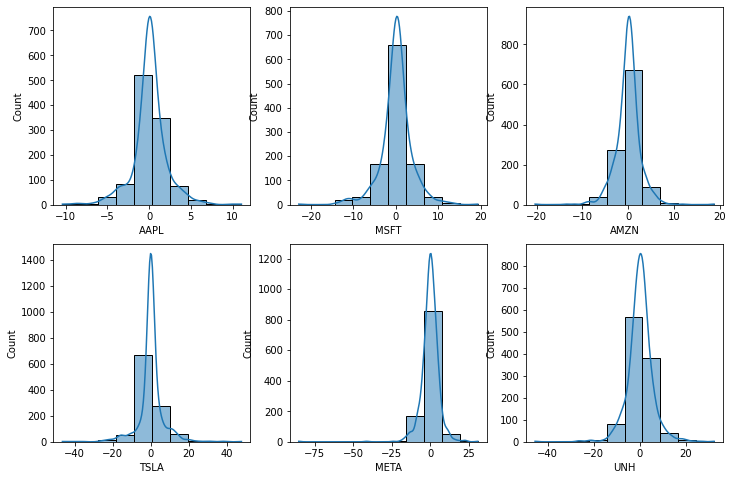

<Figure size 432x288 with 0 Axes>

In [57]:
dif=df2[['AAPL', 'MSFT', 'AMZN', 'TSLA', 'META', 'UNH']]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))


plt.figure(i)
sns.histplot(dif['AAPL'], bins=10, kde=True, ax=axs[0, 0])
sns.histplot(dif['MSFT'], bins=10, kde=True, ax=axs[0, 1])
sns.histplot(dif['AMZN'], bins=10, kde=True, ax=axs[0, 2])
sns.histplot(dif['TSLA'], bins=10, kde=True, ax=axs[1, 0])
sns.histplot(dif['META'], bins=10, kde=True, ax=axs[1, 1])
sns.histplot(dif['UNH'], bins=10, kde=True, ax=axs[1, 2])

plt.show()

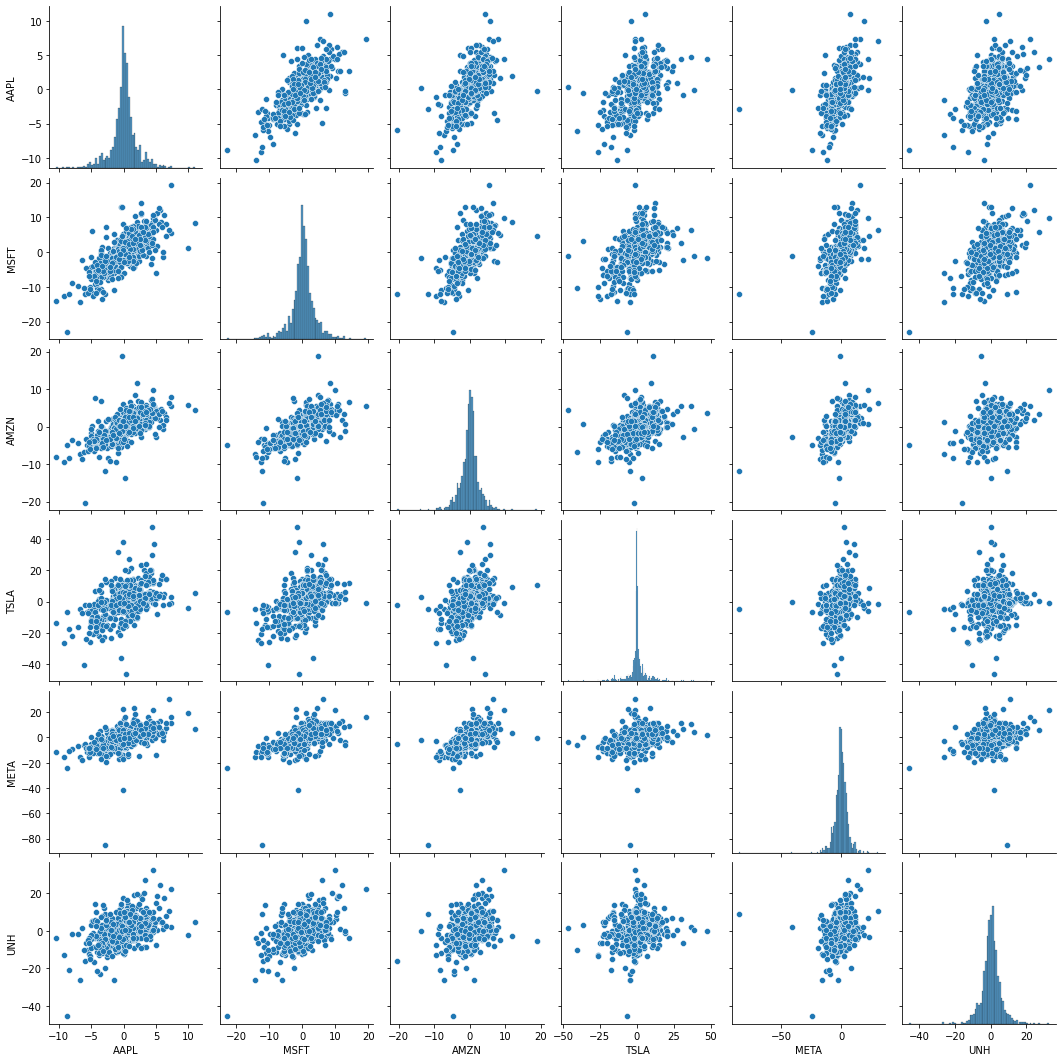

In [58]:
#Correlograma
sns.pairplot(dif, kind='scatter')
plt.show()

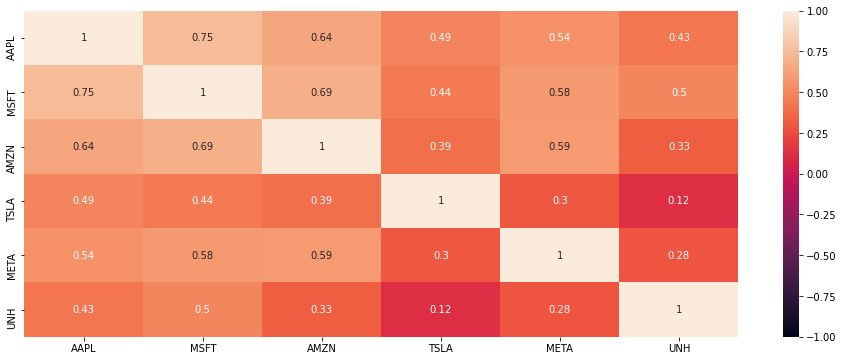

In [59]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dif.corr(), vmin=-1, vmax=1, annot=True)

Como se observa, las distribuciones son similares y correlaciones son relativamente altas, por lo que otras
empresas menos conocidas, pero con patrones similares pueden ser prometedoras.